# **Titanic Kaggle challenge**
More information at https://www.kaggle.com/c/titanic/

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import data sets

In [2]:
try:
  !mv train.csv train_old.csv
  !mv test.csv test_old.csv
except Exception as exception:
  print(exception)
!wget https://raw.githubusercontent.com/antostain/Titanic_kaggle/master/train.csv
!wget https://raw.githubusercontent.com/antostain/Titanic_kaggle/master/test.csv

--2020-04-29 14:17:41--  https://raw.githubusercontent.com/antostain/Titanic_kaggle/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2020-04-29 14:17:41 (4.04 MB/s) - ‘train.csv’ saved [61194/61194]

--2020-04-29 14:17:45--  https://raw.githubusercontent.com/antostain/Titanic_kaggle/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30234 (30K) [text/plain]
Saving to: ‘test.csv’

test

## **Training set**

In [3]:
#Read file as panda dataframe
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Test set**

In [4]:
#Read file as panda dataframe
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


## Defining x and y parts for training and test sets

In [0]:
y_train0 = df_train.Survived
x_train0 = df_train.drop(['Survived'], axis=1)

y_test = df_test.Survived
x_test = df_test.drop(['Survived'], axis=1)

# **Data Exploration on x_train0**

In [6]:
x_train0.shape

(891, 11)

In [7]:
x_train0.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Age: age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

NaN: 177


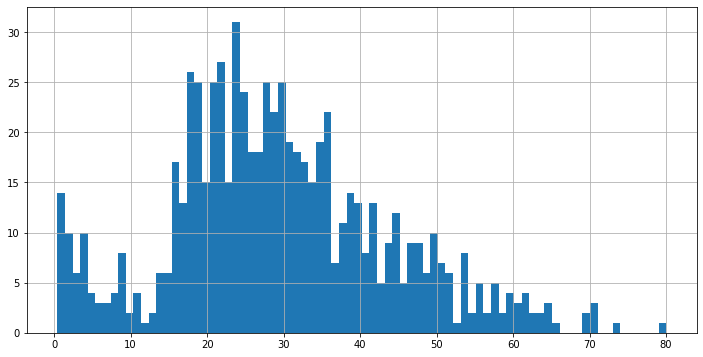

In [8]:
plt.figure(figsize=(12,6))
x_train0.Age.hist(bins=80)
print(f"NaN: {x_train0.Age.isna().sum()}")

## Sex: male, female

In [9]:
print(x_train0.Sex.value_counts())
print("NaN", x_train0.Sex.isna().sum())

male      577
female    314
Name: Sex, dtype: int64
NaN 0


## Relation between Age and Gender with respect to Survived/Dead

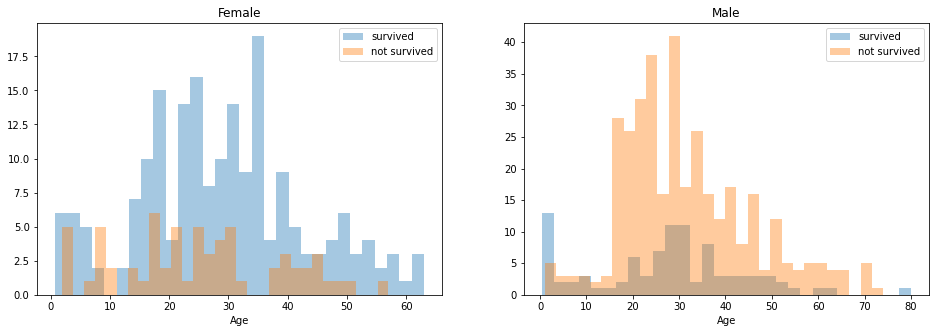

In [10]:
plot_df0 = x_train0.copy()
plot_df0['Survived'] = y_train0
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 5))
women = plot_df0[plot_df0['Sex']=='female']
men = plot_df0[plot_df0['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=30, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=30, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=30, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=30, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
plt.show()

## Pclass: a proxy for socio-economic status (SES), 1 = Upper, 2 = Middle, 3 = Lower

In [11]:
print(x_train0.Pclass.value_counts())
print("NaN", x_train0.Pclass.isna().sum())

3    491
1    216
2    184
Name: Pclass, dtype: int64
NaN 0


## Relation between Age and Pclass with respect to Survived/Dead

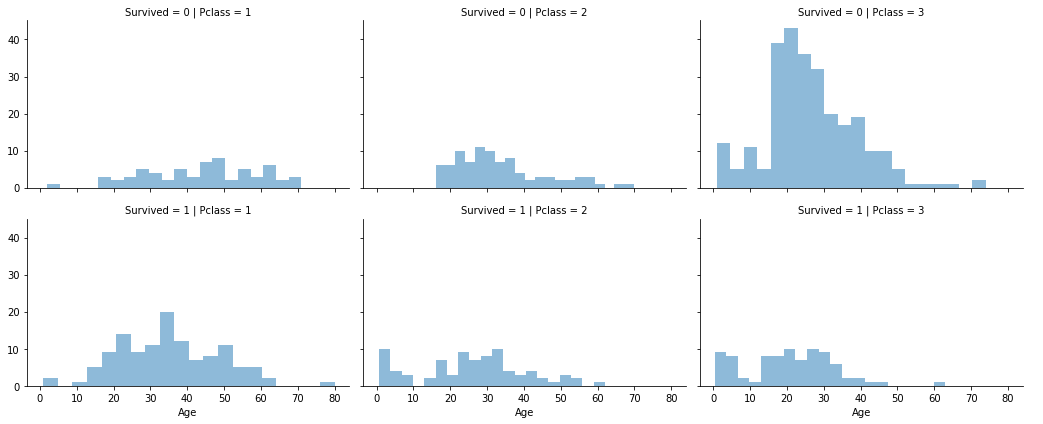

In [12]:
grid = sns.FacetGrid(plot_df0, row='Survived', col='Pclass', height=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

## Parch: # of parents / children aboard the Titanic

In [13]:
print(x_train0.Parch.value_counts())
print("NaN", x_train0.Parch.isna().sum())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
NaN 0


## SibSp: # of siblings / spouses aboard the Titanic

In [14]:
print(x_train0.SibSp.value_counts())
print("NaN", x_train0.SibSp.isna().sum())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
NaN 0


## Embark: port of Embarkation,	C = Cherbourg, Q = Queenstown, S = Southampton

In [15]:
print(x_train0.Embarked.value_counts())
print("NaN", x_train0.Embarked.isna().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
NaN 2


## Cabin: cabin number

In [16]:
print(x_train0.Cabin.value_counts())
print("NaN", x_train0.Cabin.isna().sum())

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
B102           1
B39            1
B86            1
D10 D12        1
B4             1
Name: Cabin, Length: 147, dtype: int64
NaN 687


## Fare: passenger fare

In [17]:
print(x_train0.Fare.value_counts())
print("NaN", x_train0.Fare.isna().sum())

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
NaN 0


# **Feature Engineering**

In [0]:
def feature_engineering(set_A, set_B):
  """ Feature engineering

  :param set_A: input data set A
  :param set_B: input data set B
  :return output_A: preprocessed data set A
  :return output_B: preprocessed data set B
  """
  n_rows_A = set_A.shape[0]
  
  # append set_A and set_B, and drop some columns
  combined = (set_A.append(set_B)).reset_index(drop=True)
  combined.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
  
  # fill NaN in Age using the mean of the Age in set_A
  combined.Age.fillna(combined.iloc[:n_rows_A].Age.mean(), inplace=True)
  
  # transform Sex into numeric variable
  combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
  
  # transform Pclass into three dummies
  pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
  combined = pd.concat([combined, pclass_dummies],axis=1)
  combined.drop('Pclass', axis=1, inplace=True)
  
  # fill NaN in Embarked with the most common value and transform Embarked into three dummies
  dummy_embarked = set_A.Embarked.value_counts().index[0]
  combined.Embarked.fillna(dummy_embarked, inplace=True)
  embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
  combined = pd.concat([combined, embarked_dummies], axis=1)
  combined.drop('Embarked', axis=1,inplace=True)

  # fill NaN in Fare with the mean of the Fare in set_A 
  combined.Fare.fillna(combined.iloc[:n_rows_A].Fare.mean(), inplace=True)

  # define new set_A and set_B
  output_A = combined.iloc[:n_rows_A]
  output_B = combined.iloc[n_rows_A:]

  return output_A, output_B

# **Creating a split of x_train0 into training and validation set**

Creating a split of (x_train0, y_train0) into a training set (x_train1, y_train1) and a validation set (x_val, y_val)

We choose the size of the test set to be 30% of the total size

In [0]:
from sklearn.model_selection import train_test_split

x_train1, x_val, y_train1, y_val = train_test_split(x_train0, y_train0, test_size = 0.3)

Preprocessing x_train1 and x_val using the above feature engineering

In [0]:
pp_x_train1, pp_x_val = feature_engineering(x_train1, x_val)

Columns of the new data set

In [22]:
pp_x_train1.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
pp_x_train1.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,30.0,1,1,24.1500,0,0,1,0,0,1
1,1,24.0,0,0,10.5000,0,1,0,0,0,1
2,0,53.0,2,0,51.4792,1,0,0,0,0,1
3,1,29.0,1,0,66.6000,1,0,0,0,0,1
4,0,15.0,0,1,211.3375,1,0,0,0,0,1


Checking that there are no more null values

In [24]:
pp_x_train1.isna().sum().sum()

0

## **Plots**

## Relation between Age and Pclass with respect to Survived/Dead

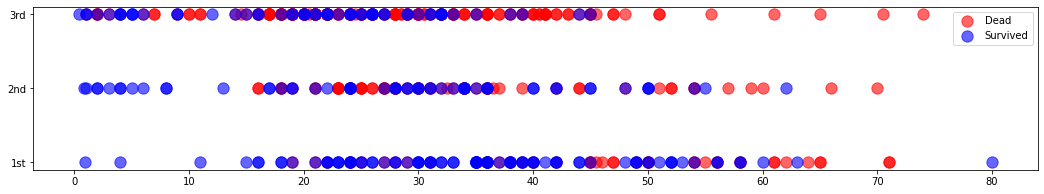

In [25]:
plt.figure(figsize=(18,3))

dead_index = (y_train1 == 0)
survived_index = (y_train1 == 1)

plt.scatter(x_train1.loc[dead_index].Age, x_train1.loc[dead_index].Pclass, 
            marker='o', s = 2**7, c = 'r', alpha=.6) 
plt.scatter(x_train1.loc[survived_index].Age, x_train1.loc[survived_index].Pclass, 
            marker='o',s = 2**7, c = 'b', alpha=.6)
plt.yticks((1,2,3), ('1st', '2nd', '3rd'))
plt.xlabel=('Age')
plt.legend(['Dead', 'Survived'])
plt.show()

## Pairplots showing the relation between pairs of features with respect to Survived/Dead

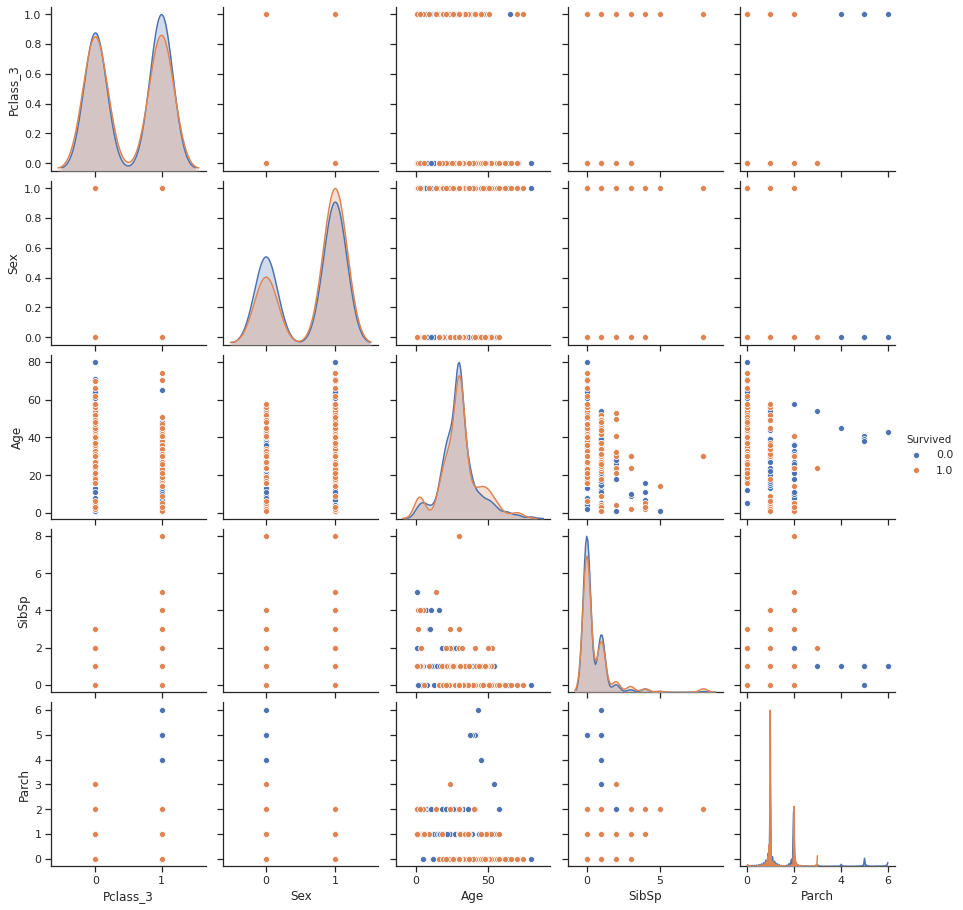

In [26]:
sns.set(style="ticks", color_codes=True)

plot_df = pp_x_train1.copy()
plot_df['Survived'] = y_train1

g = sns.pairplot(plot_df, hue='Survived', vars=['Pclass_3', 'Sex', 'Age', 'SibSp', 'Parch'])

## Correlation matrix showing correlation between pairs of features

Text(0.5, 1.0, 'Correlation matrix')

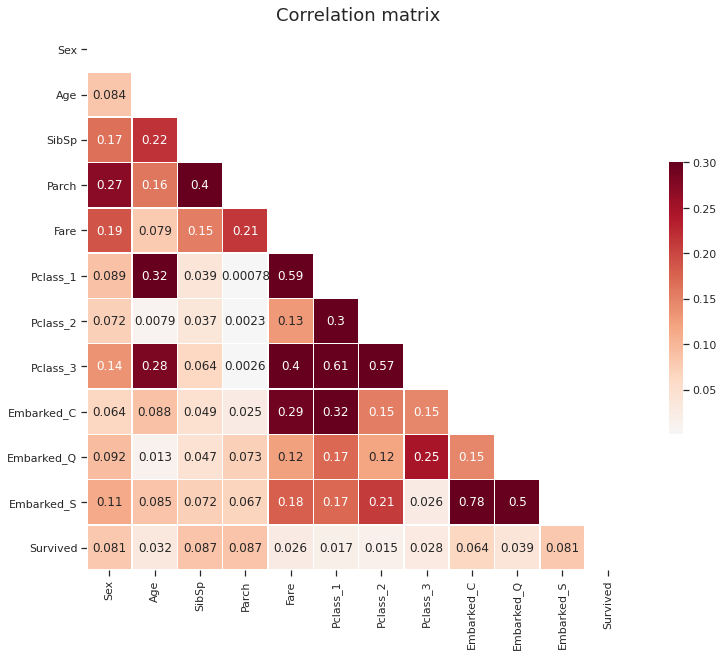

In [27]:
corr = abs(plot_df.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation matrix', fontsize=18)

# **Machine Learning methods**

In [0]:
from sklearn.metrics import accuracy_score

## **K-Nearest Neighbours Classifier**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_array = [1,2,3,5,7,10,12,15,16,17,18,19,20]

accuracies = []

for current_neighbors in n_neighbors_array:
  knn = KNeighborsClassifier(n_neighbors=current_neighbors)  
  knn.fit(pp_x_train1, y_train1)
  y_pred_knn = knn.predict(pp_x_val)
  accuracies.append((accuracy_score(y_pred_knn, y_val), current_neighbors))

sorted(accuracies, key=lambda x: x[0], reverse=True)

[(0.7238805970149254, 2),
 (0.7201492537313433, 16),
 (0.7164179104477612, 12),
 (0.7126865671641791, 15),
 (0.7089552238805971, 10),
 (0.7052238805970149, 1),
 (0.6977611940298507, 19),
 (0.6977611940298507, 20),
 (0.6940298507462687, 7),
 (0.6940298507462687, 18),
 (0.6902985074626866, 3),
 (0.6902985074626866, 17),
 (0.6828358208955224, 5)]

## **Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300) #max_iter=100 by default
lr.fit(pp_x_train1, y_train1)
y_pred_lr = lr.predict(pp_x_val)

accuracy_score(y_pred_lr, y_val)

0.7910447761194029

## **Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(pp_x_train1, y_train1)
y_pred_dtc = dtc.predict(pp_x_val)

accuracy_score(y_pred_dtc, y_val)

0.753731343283582

#### Feature importance

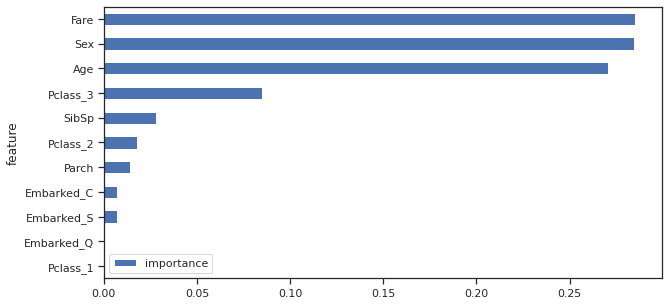

In [32]:
features = pd.DataFrame()
features['feature'] = pp_x_train1.columns
features['importance'] = dtc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10,5));

# **Run on Test set using the best model**

In [0]:
pp_x_train0, pp_x_test = feature_engineering(x_train0, x_test)

In [35]:
lr = LogisticRegression(max_iter=300) #max_iter=100 by default
lr.fit(pp_x_train0, y_train0)
y_pred_lr = lr.predict(pp_x_test)

accuracy_score(y_pred_lr, y_test)

0.9425837320574163

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(pp_x_train0, y_train0)
y_pred_dtc = dtc.predict(pp_x_test)

accuracy_score(y_pred_dtc, y_test)

0.8038277511961722

In [37]:
n_neighbors_array = [1,2,3,5,7,10,12,15,16,17,18,19,20]

accuracies = []

for current_neighbors in n_neighbors_array:
  knn = KNeighborsClassifier(n_neighbors=current_neighbors)  
  knn.fit(pp_x_train0, y_train0)
  y_pred_knn = knn.predict(pp_x_test)
  accuracies.append((accuracy_score(y_pred_knn, y_test), current_neighbors))

sorted(accuracies, key=lambda x: x[0], reverse=True)

[(0.6746411483253588, 10),
 (0.6722488038277512, 5),
 (0.6722488038277512, 7),
 (0.6698564593301436, 2),
 (0.6698564593301436, 19),
 (0.6674641148325359, 18),
 (0.6650717703349283, 20),
 (0.6578947368421053, 12),
 (0.6555023923444976, 16),
 (0.6507177033492823, 17),
 (0.6483253588516746, 15),
 (0.6339712918660287, 3),
 (0.6267942583732058, 1)]

## Further ideas for feature preprocessing

#### Processing Title

In [0]:
titles = set()
for name in combined['Name']:
  titles.add(name.split(',')[1].split('.')[0].strip())
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined.Title.map(Title_Dictionary)
titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
combined = pd.concat([combined, titles_dummies], axis=1)

#### Processing Age

In [0]:
grouped_train = combined.iloc[:n_rows_A].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(row):
  condition = (
      (grouped_median_train['Sex'] == row['Sex']) & 
      (grouped_median_train['Title'] == row['Title']) & 
      (grouped_median_train['Pclass'] == row['Pclass'])
  ) 
  return grouped_median_train[condition]['Age'].values[0]

combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
combined.drop('Title', axis=1,inplace=True)

#### Processing Family

In [0]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

### Scaling features

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 